# How do annual members and casual riders use Cyclistic bikes diffrently?

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df_1 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
df_2 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [4]:
#df_final = 

In [5]:
set(df_1.columns) == set(df_2.columns)        # checking if headers are some for both CSV files

True

In [6]:
print(df_1.columns, df_2.columns)

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object') Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [7]:
df_final = pd.concat([df_1,df_2])

In [8]:
df_final.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,2.344772e+06,2.344772e+06,2.344772e+06,2.344772e+06,2.004997e+06
mean,2.473312e+07,3.363821e+03,2.028668e+02,2.039148e+02,1.984552e+03
std,7.106488e+05,1.896561e+03,1.570433e+02,1.570719e+02,1.077792e+01
min,2.347939e+07,1.000000e+00,2.000000e+00,2.000000e+00,1.888000e+03
25%,2.412106e+07,1.715000e+03,7.700000e+01,7.700000e+01,1.980000e+03
50%,2.473690e+07,3.436000e+03,1.740000e+02,1.750000e+02,1.988000e+03
75%,2.534684e+07,5.016000e+03,2.900000e+02,2.910000e+02,1.992000e+03
max,2.596290e+07,6.946000e+03,6.730000e+02,6.730000e+02,2.003000e+03


In [9]:
df_final.head(2)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN


In [10]:
set(df_1.columns) == set(df_final.columns)

True

In [11]:
df_final['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [12]:
df_final['gender'].nunique()

2

In [13]:
df_final['birthyear'].unique()

array([1992.,   nan, 1990., 1995., 1970., 1993., 1987., 1998., 1997.,
       1973., 1965., 1988., 1984., 1989., 1999., 1991., 1986., 1985.,
       2000., 1994., 1996., 1977., 1966., 1960., 1980., 1983., 1971.,
       1981., 1964., 1982., 1976., 1962., 1963., 1967., 1975., 1968.,
       1969., 1961., 1978., 1955., 1972., 1947., 1979., 1958., 1953.,
       1952., 1949., 1957., 1956., 1959., 1974., 1950., 1948., 1951.,
       1946., 1954., 1944., 2001., 2002., 1941., 1904., 1945., 1900.,
       1940., 2003., 1939., 1934., 1942., 1931., 1935., 1899., 1910.,
       1928., 1943., 1929., 1918., 1938., 1933., 1888., 1930., 1921.,
       1889., 1901., 1920., 1925., 1909., 1890., 1937.])

In [14]:
print(df_final['birthyear'].nunique.__module__) # to check the library we are using

pandas.core.base


In [15]:
percentage = df_final['usertype'].value_counts(normalize=True) * 100

In [16]:
print(percentage)

usertype
Subscriber    74.501231
Customer      25.498769
Name: proportion, dtype: float64


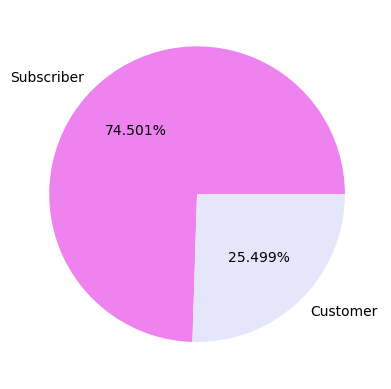

In [17]:
label = percentage.index
sizes = percentage.values
color = ['Violet','Lavender']
plt.pie(sizes, labels = label, autopct='%1.3f%%', colors = color)
plt.show()

In [18]:
print(type(sizes[0]))

<class 'numpy.float64'>


In [19]:
print(type(label[0]))

<class 'str'>


In [20]:
df_final['bikeid'].count()

2344772

In [21]:
distinct_bike_count = df_final['bikeid'].nunique()
distinct_bike_count

5947

In [22]:
df_final['start_time'] = pd.to_datetime(df_final['start_time'])  #here in below step extracted date, time and days from start start_time column
df_final['start_date'] = df_final['start_time'].dt.date
df_final['start_clock_time'] = df_final['start_time'].dt.time
df_final['start_weekday'] = df_final['start_time'].dt.day_name()

In [23]:
df_final.head(2)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_date,start_clock_time,start_weekday
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,2019-07-01,00:00:27,Monday
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN,2019-07-01,00:01:16,Monday


In [47]:
#ask #prepare #Process phases are complete.